# Video Game Sales 电子游戏销售分析
仓库地址为：https://github.com/Wchoward/DataMiningClass/tree/master/assignment3

<h1>目录<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#数据预处理：" data-toc-modified-id="数据预处理：-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>数据预处理：</a></span><ul class="toc-item"><li><span><a href="#数据摘要" data-toc-modified-id="数据摘要-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>数据摘要</a></span></li><li><span><a href="#缺失值处理" data-toc-modified-id="缺失值处理-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>缺失值处理</a></span></li></ul></li><li><span><a href="#电子游戏市场分析" data-toc-modified-id="电子游戏市场分析-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>电子游戏市场分析</a></span><ul class="toc-item"><li><span><a href="#受欢迎游戏的发行年份" data-toc-modified-id="受欢迎游戏的发行年份-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>受欢迎游戏的发行年份</a></span></li><li><span><a href="#受欢迎的游戏类型" data-toc-modified-id="受欢迎的游戏类型-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>受欢迎的游戏类型</a></span></li><li><span><a href="#受欢迎的发布平台" data-toc-modified-id="受欢迎的发布平台-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>受欢迎的发布平台</a></span></li><li><span><a href="#受欢迎的发行商" data-toc-modified-id="受欢迎的发行商-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>受欢迎的发行商</a></span></li></ul></li><li><span><a href="#电子游戏销售额预测" data-toc-modified-id="电子游戏销售额预测-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>电子游戏销售额预测</a></span><ul class="toc-item"><li><span><a href="#数据筛选" data-toc-modified-id="数据筛选-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据筛选</a></span></li><li><span><a href="#建模、训练、预测" data-toc-modified-id="建模、训练、预测-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>建模、训练、预测</a></span></li></ul></li><li><span><a href="#销售故事展示" data-toc-modified-id="销售故事展示-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>销售故事展示</a></span><ul class="toc-item"><li><span><a href="#游戏类型销售故事" data-toc-modified-id="游戏类型销售故事-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>游戏类型销售故事</a></span></li><li><span><a href="#游戏发行商销售故事" data-toc-modified-id="游戏发行商销售故事-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>游戏发行商销售故事</a></span></li></ul></li></ul></div>

In [1]:
import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def load_data(path, filename):
    return pd.read_csv(path + '/' + filename)

## 数据预处理：

### 数据摘要

确定数据集根目录：

In [3]:
root = 'data/'

In [4]:
df = load_data(root, 'vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 缺失值处理

In [5]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

由上可知Year 与 Publisher存在缺失值，删除缺失值：

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

由于数据都是在2016年及之前的游戏，2017年之后的数据非常少，删除2017年之后的数据

In [8]:
df = df[df.Year < 2017]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 电子游戏市场分析

下面将对受欢迎的游戏、类型、发布平台、发行人进行分析：

### 受欢迎游戏的发行年份

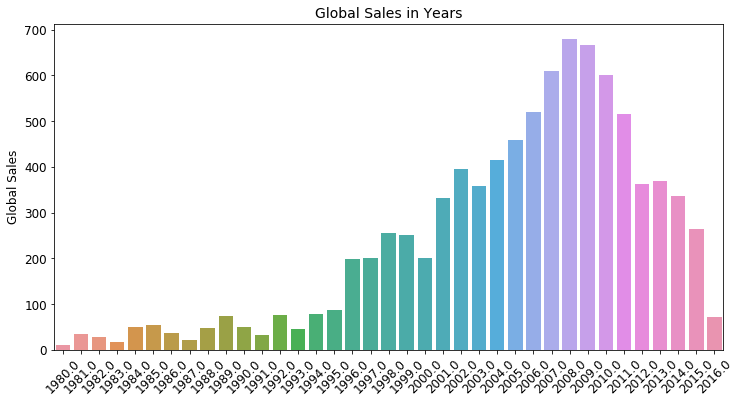

In [9]:
global_sales_df = df.groupby(['Year'])['Global_Sales'].sum()

plt.figure(figsize=(12, 6))

sns.barplot(x=global_sales_df.index, y=global_sales_df.values)

plt.ylabel('Global Sales', fontsize=12)
plt.xlabel('')
plt.title('Global Sales in Years', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

由上图可知，在2007-2010年期间发行的游戏较受欢迎，而2011年以后销量下降，由于该数据集采集的是从发行至今整体的销量（而不是按每年销量存储的数据），因此认为应该是游戏相对较新，面世时间较短，还没有许多人购买（可能后续会购买）。

### 受欢迎的游戏类型

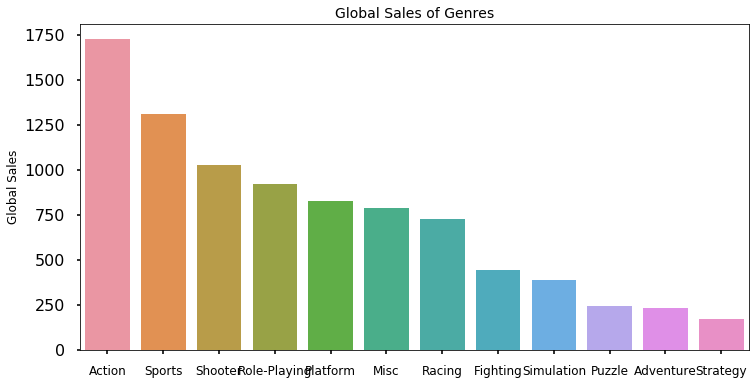

In [10]:
style.use('seaborn-poster')
genre_global_sales = df.groupby(
    ['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_global_sales.index, y=genre_global_sales.values)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Global Sales', fontsize=12)
plt.title('Global Sales of Genres', fontsize=14)
plt.show()

右上图可知，1980-2016年间，最受欢迎的游戏类型分别为 动作类（Action）、运动类（Sports)、设计类（Shooter），而最不受欢迎的游戏类型为策略类（Strategy）、冒险类（Adventure）、解谜类（Puzzle）。

### 受欢迎的发布平台

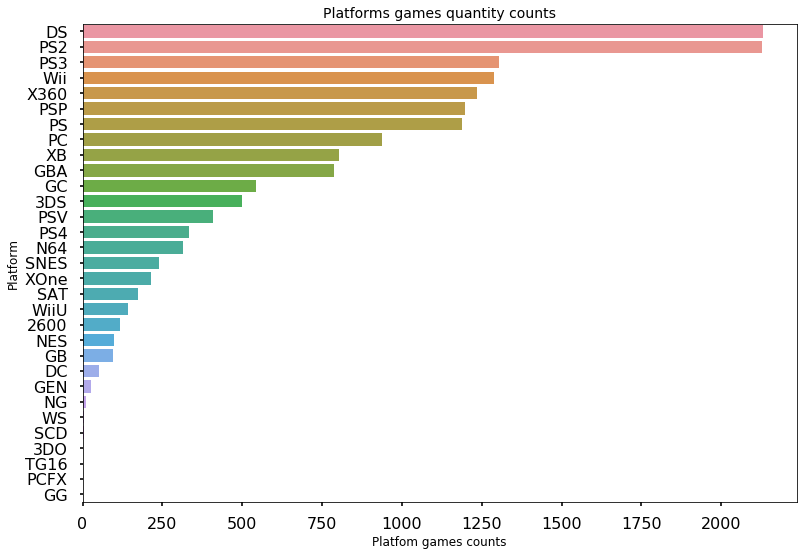

In [11]:
platform_counts = df['Platform'].value_counts().sort_values(ascending=False)
sns.barplot(y=platform_counts.index, x=platform_counts.values)
plt.xlabel('Platfom games counts', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Platforms games quantity counts', fontsize=14)
plt.show()

由上图可知，DS以及PS2平台拥有的游戏数量最高

### 受欢迎的发行商

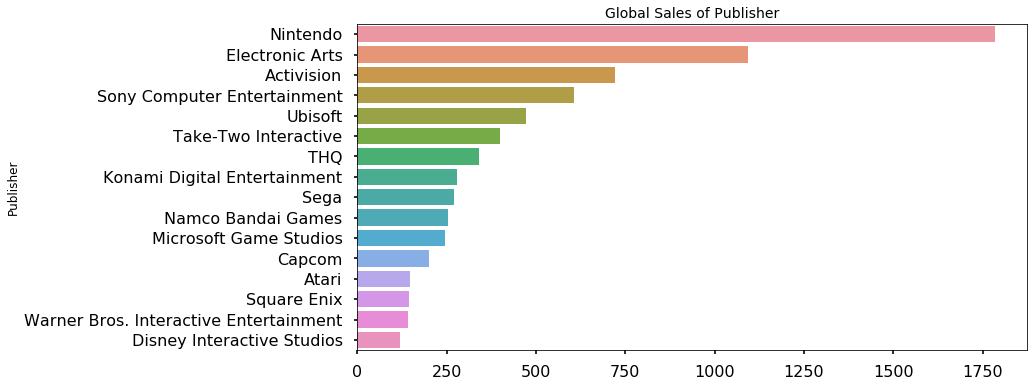

In [12]:
publisher_global_sales = df.groupby(
    ['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)
publisher_global_sales = publisher_global_sales[publisher_global_sales.values > 100]
plt.figure(figsize=(12, 6))
sns.barplot(y=publisher_global_sales.index, x=publisher_global_sales.values)
plt.xlabel('')
plt.ylabel('Publisher', fontsize=12)
plt.title('Global Sales of Publisher', fontsize=14)
plt.show()

由上图可知，Nintendo发行的游戏最受玩家欢迎

## 电子游戏销售额预测

根据 'Rank', 'Platform', 'Year', 'Genre', 'Publisher','NA_Sales'来预测'Global_Sales'

### 数据筛选

抽取出Global_Sales作为标签，抽取出'Rank', 'Platform', 'Year', 'Genre', 'Publisher','NA_Sales'作为特征：

In [13]:
from IPython.display import display
globalSales = df.Global_Sales
features = df.drop(['Name', 'EU_Sales', 'JP_Sales',
                    'Other_Sales', 'Global_Sales'], axis=1)
display(globalSales.head())
display(features.head())

0    82.74
1    40.24
2    35.82
3    33.00
4    31.37
Name: Global_Sales, dtype: float64

,Rank,Platform,Year,Genre,Publisher,NA_Sales
0,1,Wii,2006.0,Sports,Nintendo,41.49
1,2,NES,1985.0,Platform,Nintendo,29.08
2,3,Wii,2008.0,Racing,Nintendo,15.85
3,4,Wii,2009.0,Sports,Nintendo,15.75
4,5,GB,1996.0,Role-Playing,Nintendo,11.27


利用LabelEncoder对特征中的非int型数据进行编码：

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
features.Platform = le.fit_transform(df.Platform)
features.Genre = le.fit_transform(df.Genre)
features.Publisher = le.fit_transform(df.Publisher)

切分数据为训练集和测试集：

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    globalSales,
                                                    test_size=0.2,
                                                    random_state=2)

### 建模、训练、预测

采用决策树模型进行建模，并进行训练与预测：

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

regDTR = DecisionTreeRegressor(random_state=4)
regDTR.fit(X_train, y_train)
y_regDTR = regDTR.predict(X_test)

print('mean_absolute_error:', mean_absolute_error(y_test, y_regDTR))
print('r2_score:', r2_score(y_test, y_regDTR))

mean_absolute_error: 0.01796807857581354
r2_score: 0.8719585048509122


由以上结果可知，采用决策树预测根据 'Rank', 'Platform', 'Year', 'Genre', 'Publisher','NA_Sales'来预测'Global_Sales'的销售额，mean_absolute_error为0.018，拟合系数r2_score为0.872

## 销售故事展示

### 游戏类型销售故事

在此将对最受欢迎的5个类型的游戏随着时间的推移，其受欢迎程度进行展示

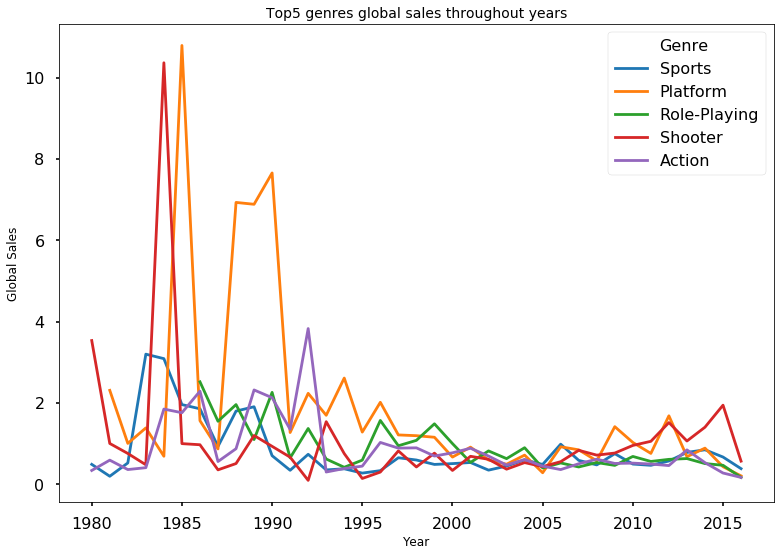

In [17]:
top5_genres = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index
top5_genre_df = df[df.Genre.isin(top5_genres)]

sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=top5_genre_df, ci=None)
plt.legend(loc='upper right')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.title('Top5 genres global sales throughout years', fontsize=14)
plt.show()

由上图可知，射击类（Shooter）和平台类（Platfom）游戏在1985 - 1990年间为销量巅峰，随后遍经历了下滑，与其他类型游戏一样趋于平稳。

### 游戏发行商销售故事

在此将对最受欢迎的5个发行商的游戏随着时间的推移，其受欢迎程度进行展示

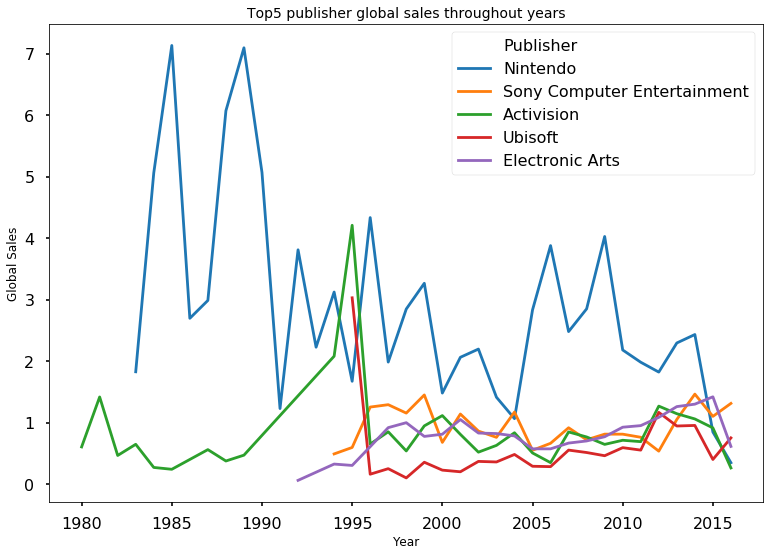

In [18]:
top5_publishers = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(5).index
top5_publisher_df = df[df.Publisher.isin(top5_publishers)]

sns.lineplot(x='Year', y='Global_Sales', hue='Publisher', data=top5_publisher_df, ci=None)
plt.legend(loc='upper right')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales', fontsize=12)
plt.title('Top5 publisher global sales throughout years', fontsize=14)
plt.show()

由上图可知，Nintendo发行的游戏在1980-2015年间虽然销量波动较大，但相较于其他发行商发行的游戏而言，销量遥遥领先，紧随其后的是Sony